In [1]:
__author__ = "@Tssp"
__date__ = "18/10/21"
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from GPE_Split_Step_Fourier import GPE_Solver
import os
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

In [2]:
L    = 40   # Domain size
N    = 600  # Number of grid points
dX   = L/N  # Cell size
x    = np.arange(-L/2, L/2, dX, dtype=complex)
dT   = 0.01 # Time step size
k    = 2*pi*np.fft.fftfreq(N, d=dX)
g    = 1
figure_path = 'Figures'
os.makedirs(figure_path, exist_ok=True)

In [3]:
def V(x):
    return 0.5*x**2

V = V(x)

In [4]:
def gauss_x(x, x0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0)) ** 2 + 1j * x))

psi0 = gauss_x(x, 0)

In [5]:
GPE = GPE_Solver(x, V, psi0, k)

GPE Solver initialized for a GRID from -20.0 to 19.933333333333195 
hbar=1 
m=1
In order to see the potential and the initial wavefunction we highly recommend to run:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, GPE.abs_square(psi0))
ax.plot(x, V, 'k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\psi_0(x)|^2$')
        


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-5.0, 5.0)

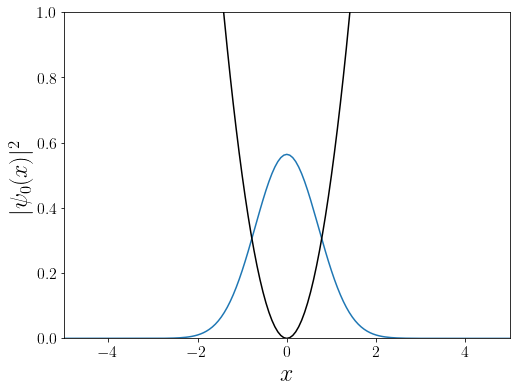

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, GPE.abs_square(psi0))
ax.plot(x, 0.5*x**2, 'k')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$|\psi_0(x)|^2$')
ax.set_ylim(0, 1)
ax.set_xlim(-5, 5)

/Users/tomy/PhD/Quantum_Fluids/SSFourier_Method/GPE_Split_Step_Fourier.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_x[0]       = psi
/Users/tomy/PhD/Quantum_Fluids/SSFourier_Method/GPE_Split_Step_Fourier.py:105: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_k[0]       = fft(psi)
/Users/tomy/PhD/Quantum_Fluids/SSFourier_Method/GPE_Split_Step_Fourier.py:111: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_k[i+1] = psi
/Users/tomy/PhD/Quantum_Fluids/SSFourier_Method/GPE_Split_Step_Fourier.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_x[i+1] = psi
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2802: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


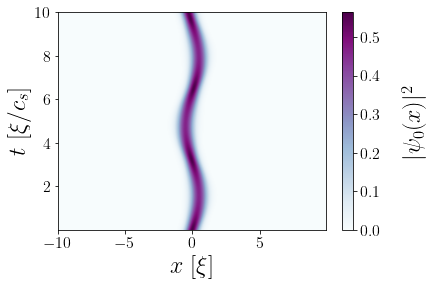

In [9]:
GPE.run_and_plot(1000, dT, g, figure_path+'/GPE_GaussianHO.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/p

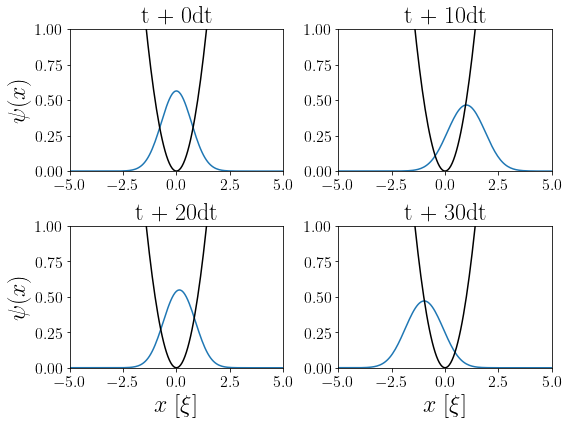

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
count = 0
for i in range(2):
    for j in range(2):
        ax[i][j].plot(x, GPE.prob_densities[count*150])
        ax[i][j].set_xlim(-L/2, L/2)
        ax[i][j].set_ylim(0, 1.1)
        ax[i][j].set_title(f't + {count*10}dt')
        ax[i][j].plot(x, 0.5*x**2, 'k')
        ax[i][j].set_ylim(0, 1)
        ax[i][j].set_xlim(-5, 5)
        count+=1
ax[1][0].set_xlabel('$x$ $[\\xi]$')
ax[1][1].set_xlabel('$x$ $[\\xi]$')
ax[0][0].set_ylabel('$\psi(x)$')
ax[1][0].set_ylabel('$\psi(x)$')
fig.tight_layout()

# GIF

In [ ]:
for i in range(len(GPE.prob_densities)):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, GPE.prob_densities[i*10])
    ax.plot(x, 0.5*x**2, 'k')
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 0.8)
    ax.set_title(f't + {i*10}dt')
    ax.set_xlabel('$x$ $[\\xi]$')
    ax.set_ylabel('$\psi(x)$')
    fig.tight_layout()
    plt.savefig(figure_path+f'/GPE_gaussian1D_{i}.png', dpi=300, bbox_inches='tight')

from PIL import Image
imgs = [Image.open(figure_path+f'/GPE_gaussian1D_{i}.png') for i in range(100)]
imgs[0].save(figure_path+"/GPE_HO1D.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)